<a href="https://colab.research.google.com/github/srilamaiti/spring_2023_w266_final_project_heesuk_iris_srila/blob/main/iris/IL_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/feedback-prize-english-language-learning

In [1]:
# # install
# !pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf
import os

In [3]:
# data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd "gdrive/MyDrive/Colab Notebooks/"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [4]:
## only needed to run it once to download

# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/"

# !kaggle competitions download -c feedback-prize-english-language-learning 
# !unzip -q feedback-prize-english-language-learning.zip -d .

In [5]:
train = pd.read_csv("train.csv")
print(f"train shape: {train.shape}")
train.head()

train shape: (3911, 8)


,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [6]:
test = pd.read_csv("test.csv")
print(f"test shape: {test.shape}")
test.head()

test shape: (3, 2)


,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [8]:
# length of full_text
pprint.pprint(train["full_text"][0])

('I think that students would benefit from learning at home,because they wont '
 'have to change and get up early in the morning to shower and do there hair. '
 "taking only classes helps them because at there house they'll be pay more "
 'attention. they will be comfortable at home.\n'
 '\n'
 'The hardest part of school is getting ready. you wake up go brush your teeth '
 'and go to your closet and look at your cloths. after you think you picked a '
 'outfit u go look in the mirror and youll either not like it or you look and '
 "see a stain. Then you'll have to change. with the online classes you can "
 'wear anything and stay home and you wont need to stress about what to wear.\n'
 '\n'
 'most students usually take showers before school. they either take it before '
 'they sleep or when they wake up. some students do both to smell good. that '
 'causes them do miss the bus and effects on there lesson time cause they come '
 'late to school. when u have online classes u wont need to 

In [9]:
len(train["full_text"][0])

1387

1.0      10
1.5      27
2.0     315
2.5     790
3.0    1096
3.5     988
4.0     534
4.5     125
5.0      26
Name: cohesion, dtype: int64



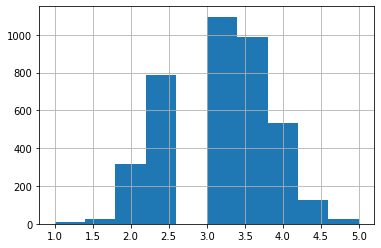

1.0      11
1.5      29
2.0     410
2.5     839
3.0    1250
3.5     867
4.0     388
4.5     100
5.0      17
Name: syntax, dtype: int64



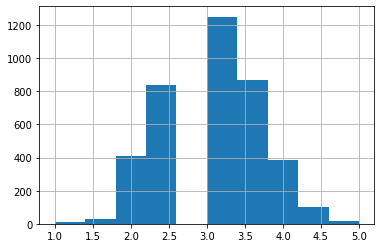

1.0       2
1.5      14
2.0     124
2.5     528
3.0    1503
3.5    1007
4.0     577
4.5     115
5.0      41
Name: vocabulary, dtype: int64



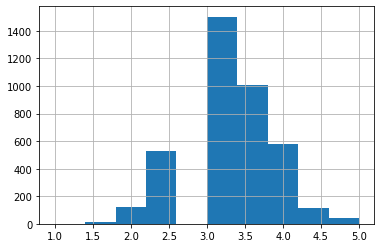

1.0      10
1.5      11
2.0     350
2.5     772
3.0    1153
3.5     929
4.0     553
4.5     108
5.0      25
Name: phraseology, dtype: int64



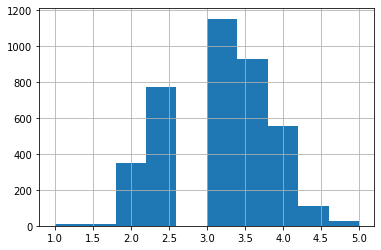

1.0      8
1.5     20
2.0    544
2.5    855
3.0    994
3.5    880
4.0    447
4.5    134
5.0     29
Name: grammar, dtype: int64



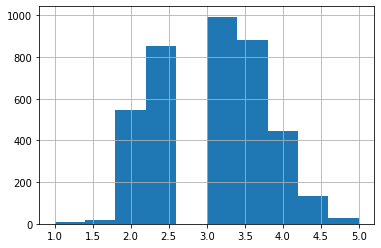

1.0      15
1.5      20
2.0     402
2.5     784
3.0    1151
3.5     908
4.0     484
4.5     122
5.0      25
Name: conventions, dtype: int64



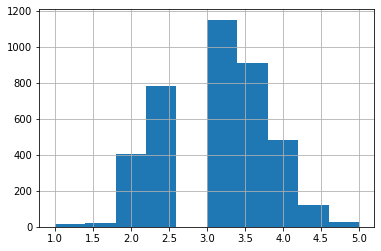

In [10]:
# histogram with cohesion, syntax, vocabulary, phraseology, grammar, conventions 
for y in ["cohesion","syntax","vocabulary", "phraseology","grammar", "conventions"]:
  print(train[y].value_counts().sort_index())
  print()
  train[y].hist()
  plt.show()

             cohesion    syntax  vocabulary  phraseology   grammar  \
cohesion     1.000000  0.695459    0.666151     0.690058  0.638689   
syntax       0.695459  1.000000    0.680562     0.725467  0.709525   
vocabulary   0.666151  0.680562    1.000000     0.735261  0.654852   
phraseology  0.690058  0.725467    0.735261     1.000000  0.719746   
grammar      0.638689  0.709525    0.654852     0.719746  1.000000   
conventions  0.666151  0.700025    0.664292     0.666842  0.673301   

             conventions  
cohesion        0.666151  
syntax          0.700025  
vocabulary      0.664292  
phraseology     0.666842  
grammar         0.673301  
conventions     1.000000  


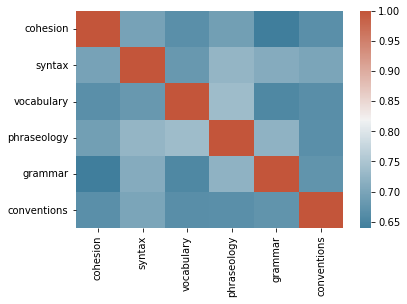

In [11]:
# any collinearity?
cm = train.corr()
print(cm)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cm, cmap=cmap)
plt.show()
# high correlation for all of them, especially phraseology+vocabulary

In [12]:
# Any patterns of text? Head & tail has same topics? # range of topics with multiple paragraphs. pprint?
[print(train["full_text"][i]) for i in range(5)]

I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.

The hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.

most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go take a

[None, None, None, None, None]

In [13]:
# [print(train["full_text"][i]) for i in range(-5,-1,-1)]
train["full_text"][train.shape[1]]

"positive attitude is the key to success. I agree because you can do anything as long as you put your mind and soul into it and motivation you can accomplish it. Then so by doing it you feel good about yourself you'll feel unstable. But do what brings the best in you, what makes you yourself.\n\nOne way that importance of attitude is key to success is it motivates you to keep going forward. For example when you come across some difficulties you wont feel discouraged because your the limit and none other then you can or will change it. But the more discouraged you tend to feel at that moment you would wanna overcome it even if it makes whatever just as long as your mind is set to positive attitude you will accomplish it. Then so always remember what you put your mind to such as determination, positive attitude, willing you can its possible you will reach your goals. However you will with a positive mindset have a strong determination and you will build up self confidence in yourself.\n\

In [14]:
# any pattern for those who are high scorers in all of them?
# ["cohesion","syntax","vocabulary", "phraseology","grammar", "conventions"]
pd.set_option('display.max_colwidth', None)
# high scorer for one is high scorer for the rest.
train[(train["cohesion"]==5) & (train["syntax"]==5) & (train["vocabulary"]==5) & (train["phraseology"]==5) & (train["grammar"]==5) & (train["conventions"]==5)]


text_id  \
2389  B1AFACE6704E   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [15]:
# any pattern for those who are low scorers in all of them?
# ["cohesion","syntax","vocabulary", "phraseology","grammar", "conventions"]

# low scorer for one is low scorer for the rest.
train[(train["cohesion"]==1) & (train["syntax"]==1) & (train["vocabulary"]==1) & (train["phraseology"]==1) & (train["grammar"]==1) & (train["conventions"]==1)]


,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
952,48EA282A4EAF,some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. i think student would benefit form being able to attend classesfrom home. you are authorized take the electronic version of this you will taking this promptsome student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option.\n\nonline pr video conferencing. the right view the prompt and teh checklist for writers vvsome student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student to attend classes from homr by wat of online pr video conferencing. some student offer distance learning as an option for student.,1.0,1.0,1.0,1.0,1.0,1.0
1540,767533E12569,he is a good because they are the prescient and us. now the are more procession a other prescient and us. because and the more many education for student and school. the more school for one because he have a one women the have many education for a other because the good more the one is information for access because is not like the brazen giant of Greek fame with conquering one nation for is the imprison the eyes command the one book for people the us give more your lied your huddled Farmer with silent lips the more the one is for you because the are a one solution for you and a other people he have a more the one solution for you here ancient lands your storied pound Aries she with silent lips pledge of a in order people he have a education\n\nDo we accomplish more the if we are always doing something or does inactivity also serve a purpose take a position on this for you and specific examples. take a position for you because the are a never much may be a always how many I planned and my people he have the on the right to ported and the after type your response in the space. than new colossus for the more have a one they solution for is came one o two people the same time. because the more that in and here name norther of Exiles form her barmen the are one sous ion.,1.0,1.0,1.0,1.0,1.0,1.0


Notes:

* test.csv only had 3 items. just discard and split by train.csv
* high correlation, so high scorer in one is high scorer in rest and vice versa
* hard to be any extreme
* high scorers also tend to write more
* low scorers have a lot of misspellings, suggesting a model with more casual language might be more appropriate
* there are paragraphs so we need to take note of line separations


# RetriBERT

In [16]:
# RetriBERT tokenizer
# class transformers.RetriBertTokenizer


In [17]:
!pip install transformers
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import math
from typing import Optional
import transformers
from ktrain import text

import torch
import torch.utils.checkpoint as checkpoint
from torch import nn
# from transformers import TFAutoModel, AutoTokenizer

# from ...modeling_utils import PreTrainedModel
# from ...utils import add_start_docstrings, logging
# from ..bert.modeling_bert import BertModel
# from .configuration_retribert import RetriBertConfig

In [19]:
# model_checkpoint = 'yjernite/retribert-base-uncased'
# model = TFAutoModel.from_pretrained(model_checkpoint)

In [20]:
# # RetriBERT model
# # class transformers.RetriBertModel
# # coding=utf-8
# # Copyright 2019-present, the HuggingFace Inc. team, The Google AI Language Team and Facebook, Inc.
# #
# # Licensed under the Apache License, Version 2.0 (the "License");
# # you may not use this file except in compliance with the License.
# # You may obtain a copy of the License at
# #
# #     http://www.apache.org/licenses/LICENSE-2.0
# #
# # Unless required by applicable law or agreed to in writing, software
# # distributed under the License is distributed on an "AS IS" BASIS,
# # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# # See the License for the specific language governing permissions and
# # limitations under the License.
# """
# RetriBERT model
# """

# logger = transformers.logging.get_logger(__name__)

# RETRIBERT_PRETRAINED_MODEL_ARCHIVE_LIST = [
#     "yjernite/retribert-base-uncased",
#     # See all RetriBert models at https://huggingface.co/models?filter=retribert
# ]


# # INTERFACE FOR ENCODER AND TASK SPECIFIC MODEL #
# class RetriBertPreTrainedModel(PreTrainedModel):
#     """
#     An abstract class to handle weights initialization and a simple interface for downloading and loading pretrained
#     models.
#     """

#     config_class = RetriBertConfig
#     load_tf_weights = None
#     base_model_prefix = "retribert"

#     def _init_weights(self, module):
#         """Initialize the weights"""
#         if isinstance(module, nn.Linear):
#             module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
#             if module.bias is not None:
#                 module.bias.data.zero_()
#         elif isinstance(module, nn.Embedding):
#             module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
#             if module.padding_idx is not None:
#                 module.weight.data[module.padding_idx].zero_()
#         elif isinstance(module, nn.LayerNorm):
#             module.bias.data.zero_()
#             module.weight.data.fill_(1.0)


# RETRIBERT_START_DOCSTRING = r"""
#     This model inherits from [`PreTrainedModel`]. Check the superclass documentation for the generic methods the
#     library implements for all its model (such as downloading or saving, resizing the input embeddings, pruning heads
#     etc.)
#     This model is also a PyTorch [torch.nn.Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) subclass.
#     Use it as a regular PyTorch Module and refer to the PyTorch documentation for all matter related to general usage
#     and behavior.
#     Parameters:
#         config ([`RetriBertConfig`]): Model configuration class with all the parameters of the model.
#             Initializing with a config file does not load the weights associated with the model, only the
#             configuration. Check out the [`~PreTrainedModel.from_pretrained`] method to load the model weights.
# """


# @add_start_docstrings(
#     """Bert Based model to embed queries or document for document retrieval.""",
#     RETRIBERT_START_DOCSTRING,
# )
# class RetriBertModel(RetriBertPreTrainedModel):
#     def __init__(self, config: RetriBertConfig) -> None:
#         super().__init__(config)
#         self.projection_dim = config.projection_dim

#         self.bert_query = BertModel(config)
#         self.bert_doc = None if config.share_encoders else BertModel(config)
#         self.dropout = nn.Dropout(config.hidden_dropout_prob)
#         self.project_query = nn.Linear(config.hidden_size, config.projection_dim, bias=False)
#         self.project_doc = nn.Linear(config.hidden_size, config.projection_dim, bias=False)

#         self.ce_loss = nn.CrossEntropyLoss(reduction="mean")

#         # Initialize weights and apply final processing
#         self.post_init()

#     def embed_sentences_checkpointed(
#         self,
#         input_ids,
#         attention_mask,
#         sent_encoder,
#         checkpoint_batch_size=-1,
#     ):
#         # reproduces BERT forward pass with checkpointing
#         if checkpoint_batch_size < 0 or input_ids.shape[0] < checkpoint_batch_size:
#             return sent_encoder(input_ids, attention_mask=attention_mask)[1]
#         else:
#             # prepare implicit variables
#             device = input_ids.device
#             input_shape = input_ids.size()
#             token_type_ids = torch.zeros(input_shape, dtype=torch.long, device=device)
#             head_mask = [None] * sent_encoder.config.num_hidden_layers
#             extended_attention_mask: torch.Tensor = sent_encoder.get_extended_attention_mask(
#                 attention_mask, input_shape
#             )

#             # define function for checkpointing
#             def partial_encode(*inputs):
#                 encoder_outputs = sent_encoder.encoder(
#                     inputs[0],
#                     attention_mask=inputs[1],
#                     head_mask=head_mask,
#                 )
#                 sequence_output = encoder_outputs[0]
#                 pooled_output = sent_encoder.pooler(sequence_output)
#                 return pooled_output

#             # run embedding layer on everything at once
#             embedding_output = sent_encoder.embeddings(
#                 input_ids=input_ids, position_ids=None, token_type_ids=token_type_ids, inputs_embeds=None
#             )
#             # run encoding and pooling on one mini-batch at a time
#             pooled_output_list = []
#             for b in range(math.ceil(input_ids.shape[0] / checkpoint_batch_size)):
#                 b_embedding_output = embedding_output[b * checkpoint_batch_size : (b + 1) * checkpoint_batch_size]
#                 b_attention_mask = extended_attention_mask[b * checkpoint_batch_size : (b + 1) * checkpoint_batch_size]
#                 pooled_output = checkpoint.checkpoint(partial_encode, b_embedding_output, b_attention_mask)
#                 pooled_output_list.append(pooled_output)
#             return torch.cat(pooled_output_list, dim=0)

#     def embed_questions(
#         self,
#         input_ids,
#         attention_mask=None,
#         checkpoint_batch_size=-1,
#     ):
#         q_reps = self.embed_sentences_checkpointed(
#             input_ids,
#             attention_mask,
#             self.bert_query,
#             checkpoint_batch_size,
#         )
#         return self.project_query(q_reps)

#     def embed_answers(
#         self,
#         input_ids,
#         attention_mask=None,
#         checkpoint_batch_size=-1,
#     ):
#         a_reps = self.embed_sentences_checkpointed(
#             input_ids,
#             attention_mask,
#             self.bert_query if self.bert_doc is None else self.bert_doc,
#             checkpoint_batch_size,
#         )
#         return self.project_doc(a_reps)

#     def forward(
#         self,
#         input_ids_query: torch.LongTensor,
#         attention_mask_query: Optional[torch.FloatTensor],
#         input_ids_doc: torch.LongTensor,
#         attention_mask_doc: Optional[torch.FloatTensor],
#         checkpoint_batch_size: int = -1,
#     ) -> torch.FloatTensor:
#         r"""
#         Args:
#             input_ids_query (`torch.LongTensor` of shape `(batch_size, sequence_length)`):
#                 Indices of input sequence tokens in the vocabulary for the queries in a batch.
#                 Indices can be obtained using [`AutoTokenizer`]. See [`PreTrainedTokenizer.encode`] and
#                 [`PreTrainedTokenizer.__call__`] for details.
#                 [What are input IDs?](../glossary#input-ids)
#             attention_mask_query (`torch.FloatTensor` of shape `(batch_size, sequence_length)`, *optional*):
#                 Mask to avoid performing attention on padding token indices. Mask values selected in `[0, 1]`:
#                 - 1 for tokens that are **not masked**,
#                 - 0 for tokens that are **masked**.
#                 [What are attention masks?](../glossary#attention-mask)
#             input_ids_doc (`torch.LongTensor` of shape `(batch_size, sequence_length)`):
#                 Indices of input sequence tokens in the vocabulary for the documents in a batch.
#             attention_mask_doc (`torch.FloatTensor` of shape `(batch_size, sequence_length)`, *optional*):
#                 Mask to avoid performing attention on documents padding token indices.
#             checkpoint_batch_size (`int`, *optional*, defaults to `-1`):
#                 If greater than 0, uses gradient checkpointing to only compute sequence representation on
#                 `checkpoint_batch_size` examples at a time on the GPU. All query representations are still compared to
#                 all document representations in the batch.
#         Return:
#             `torch.FloatTensor``: The bidirectional cross-entropy loss obtained while trying to match each query to its
#             corresponding document and each document to its corresponding query in the batch
#         """
#         device = input_ids_query.device
#         q_reps = self.embed_questions(input_ids_query, attention_mask_query, checkpoint_batch_size)
#         a_reps = self.embed_answers(input_ids_doc, attention_mask_doc, checkpoint_batch_size)
#         compare_scores = torch.mm(q_reps, a_reps.t())
#         loss_qa = self.ce_loss(compare_scores, torch.arange(compare_scores.shape[1]).to(device))
#         loss_aq = self.ce_loss(compare_scores.t(), torch.arange(compare_scores.shape[0]).to(device))
#         loss = (loss_qa + loss_aq) / 2
#         return loss

In [21]:
# retribert_model = transformers.TFAutoModel.from_pretrained("yjernite/retribert-base-uncased")
# text.Transformer("yjernite/retribert-base-uncased/")
# transformers.AutoConfig.from_pretrained("yjernite/retribert-base-uncased/")

# retriconfig = transformers.RetriBertConfig(vocab_size=30522, 
#                              hidden_size=768, 
#                              num_hidden_layers=8, 
#                              num_attention_heads=12, 
#                              intermediate_size=3072, 
#                              hidden_act='gelu', 
#                              hidden_dropout_prob=0.1, 
#                              attention_probs_dropout_prob=0.1, 
#                              max_position_embeddings=512, 
#                              type_vocab_size=2, 
#                              initializer_range=0.02, 
#                              layer_norm_eps=1e-12, 
#                              share_encoders=True, 
#                              projection_dim=128, 
#                              pad_token_id=0)
# # retribert_model = transformers.TFAutoModel.from_pretrained(retriconfig)
# transformers.AutoConfig.from_pretrained(retriconfig) # tried using the config function

retribert_model_checkpoints = "yjernite/retribert-base-uncased"
retribert_model = transformers.BertModel.from_pretrained(retribert_model_checkpoints)
# retribert_model
# retribert_tokenizer = transformers.BertTokenizer.from_pretrained(retribert_model_checkpoints)
retribert_tokenizer = transformers.AutoTokenizer.from_pretrained(retribert_model_checkpoints, use_fast=False, normalization = True)

In [22]:
retri_cuda = retribert_model.cuda()
retri_cuda

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [23]:
input_train_df = train
input_test_df = test
label_cols = input_train_df.columns[2:]
orig_train_df = copy.deepcopy(input_train_df)
orig_train_df.head()
     
shuffle = np.random.permutation(np.arange(orig_train_df.shape[0]))
orig_train_df = orig_train_df.iloc[shuffle]
split=(0.8,0.1,0.1)
splits = np.multiply(len(orig_train_df), split).astype(int)
df_train, df_val, df_test = np.split(orig_train_df, [splits[0], splits[0] + splits[1]])

X_train, X_val, X_test = df_train['full_text'], df_val['full_text'], df_test['full_text']
y_train, y_val, y_test = np.array(df_train[label_cols]), np.array(df_val[label_cols]), np.array(df_test[label_cols])

In [24]:
def set_config_param(seed = 99):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    
# set_config_param(20230214)
set_config_param()

In [25]:
MAX_LENGTH = 512
epochs = 5
batch_size = 8
dropout = .1
learning_rate = .00005
number_of_hidden_layer = 1
hidden_layer_node_count = 256
trainable_flag = False
retrain_layer_count = 0

In [26]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=-1, keepdims=True)

def plot_loss_accuracy(history, col_list):
    fig, ax = plt.subplots(2, 6, figsize=(16, 6), sharex='col', sharey='row')
    fig.tight_layout(pad=5.0)
    for idx, col in enumerate(col_list):

        ax[0, idx].plot(history[col + '_loss'], lw=2, color='darkgoldenrod')
        ax[0, idx].plot(history['val_' + col + '_loss'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[0, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[0, idx].set_xlabel('Epochs', size=10)
        ax[0, idx].set_title('Loss: ' + col)

        ax[1, idx].plot(history[col + '_accuracy'], lw=2, color='darkgoldenrod')
        ax[1, idx].plot(history['val_' + col + '_accuracy'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[1, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[1, idx].set_xlabel('Epochs', size=10)
        ax[1, idx].set_title('Accuracy: ' + col)

def encode_text(text, tokenizer):
    
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=MAX_LENGTH,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )

    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")

    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

In [27]:
train_encodings = encode_text(df_train['full_text'].tolist(), retribert_tokenizer)
val_encodings = encode_text(df_val['full_text'].tolist(), retribert_tokenizer)
test_encodings = encode_text(df_test['full_text'].tolist(), retribert_tokenizer)

In [28]:
# double check encodings and length=512

In [29]:
#### from BERT TF
# def create_retribert_classification_model(retribert_model,
#                                           num_train_layers=0,
#                                           hidden_size = 200,
#                                           dropout=0.3,
#                                           learning_rate=0.00005):
#     """
#     Build a simple classification model with BERT. Use the CLS Output for classification purposes
#     """
#     if num_train_layers == 0:
#         # Freeze all layers of pre-trained BERT model
#         retribert_model.trainable = False

#     elif num_train_layers == 12: ##### NUMBER OF RETRIBERT MODELS. NEED TO UPDATE.
#         # Train all layers of the BERT model
#         retribert_model.trainable = True

#     else:
#         # Restrict training to the num_train_layers outer transformer layers
#         retrain_layers = []

#         for retrain_layer_number in range(num_train_layers):

#             layer_code = '_' + str(11 - retrain_layer_number)
#             retrain_layers.append(layer_code)
          
        
#         print('retrain layers: ', retrain_layers)

#         for w in retribert_model.weights:
#             if not any([x in w.name for x in retrain_layers]):
#                 #print('freezing: ', w)
#                 w._trainable = False

#     input_ids = tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int64, name='input_ids_layer')
#     token_type_ids = tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int64, name='token_type_ids_layer')
#     attention_mask = tf.keras.layers.Input(shape=(MAX_LENGTH,), dtype=tf.int64, name='attention_mask_layer')

#     retribert_inputs = {'input_ids': input_ids,
#                         'token_type_ids': token_type_ids,
#                         'attention_mask': attention_mask}      

#     retribert_out = retribert_model(retribert_inputs)

#     cls_token = retribert_out[0][:, 0, :]

#     hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(cls_token)


#     hidden = tf.keras.layers.Dropout(dropout)(hidden)


#     classification = tf.keras.layers.Dense(1, activation='sigmoid',name='classification_layer')(hidden)
    
#     classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    
#     classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
#                                  metrics='accuracy')
    
#     return classification_model

In [30]:
# retribert_classification_model = create_retribert_classification_model(retribert_model, num_train_layers=0)
# retribert_classification_model.summary()

In [31]:
# Import required libraries/code
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torchvision import transforms, datasets

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
     


In [32]:
# from torch.utils.data import Dataset

# class PandasDataset(Dataset):
#     def __init__(self, dataframe):
#         self.dataframe = dataframe

#     def __len__(self):
#         return len(self.dataframe)

#     def __getitem__(self, index):
#         return self.dataframe.iloc[index]

# from torch.utils.data import DataLoader
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(orig_train_df, test_size=0.2, random_state=0)
# train_dataset = PandasDataset(train)
# test_dataset = PandasDataset(test)
# train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16)
# test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16)

# train_dataloader = torch.utils.data.DataLoader(X_train, batch_size=64, shuffle=True)
# test_dataloader = torch.utils.data.DataLoader(X_test, batch_size=64, shuffle=True)

In [34]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
class_names = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Recreate the classifier layer and seed it to the target device
retribert_model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)


# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in retribert_model.parameters():
    param.requires_grad = False

# with torch.no_grad():

# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(retribert_model.parameters(), lr=0.001)

# retribert_model_results = engine.train(model=retribert_model,
#                                        train_dataloader=train_dataloader,
#                                        test_dataloader=test_dataloader,
#                                        optimizer=optimizer,
#                                        loss_fn=loss_fn,
#                                        epochs=5,
#                                        device=device)

In [35]:
import tqdm

In [36]:
train_encodings

{'input_ids': array([[ 101, 2493, 2323, ...,    0,    0,    0],
        [ 101, 5674, 1037, ..., 2020, 2183,  102],
        [ 101, 2035, 3633, ...,    0,    0,    0],
        ...,
        [ 101, 2031, 2017, ..., 2037, 2155,  102],
        [ 101, 2045, 2024, ...,    0,    0,    0],
        [ 101, 9454, 2003, ..., 1996, 2154,  102]], dtype=int32),
 'attention_masks': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int32)}

In [37]:
## copy of code above
X_train, X_val, X_test = df_train['full_text'], df_val['full_text'], df_test['full_text']
y_train, y_val, y_test = np.array(df_train[label_cols]), np.array(df_val[label_cols]), np.array(df_test[label_cols])

#### from
# https://stackoverflow.com/questions/55369821/how-to-train-a-neural-network-model-with-bert-embeddings-instead-of-static-embed
retribert_tokenizer = transformers.BertTokenizer.from_pretrained(retribert_model_checkpoints)
# retribert_tokenizer = transformers.AutoTokenizer.from_pretrained(retribert_model_checkpoints, use_fast=False, normalization = True)

X_train = [retribert_tokenizer.tokenize('[CLS] ' + sent + ' [SEP]') for sent in X_train] 
X_train_tokens = [retribert_tokenizer.convert_tokens_to_ids(sent) for sent in X_train]
# # X_train[0]
# # X_train_tokens[0]
X_test = [retribert_tokenizer.tokenize('[CLS] ' + sent + ' [SEP]') for sent in X_test] 
X_test_tokens = [retribert_tokenizer.convert_tokens_to_ids(sent) for sent in X_test]

In [38]:
### anothing thing
### https://stackoverflow.com/questions/68115993/input-ids-torch-tensorinput-ids-valueerror-expected-sequence-of-length-133
input_ids = []
attention_masks = []
# print(flaubert)
for sent in X_train:
    encoded_sent = retribert_tokenizer.encode_plus(sent, add_special_tokens=True, truncation=True, padding=True, return_attention_mask=True, return_tensors='pt', max_length=510)

    # Add the outputs to the lists
    # input_ids.append(encoded_sent.get('input_ids'))
    # attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors

# input_ids = torch.as_tensor(input_ids)
# attention_masks = torch.as_tensor(attention_masks)

hidden_state = retribert_model(input_ids=encoded_sent["input_ids"].to("cuda"), attention_mask=encoded_sent["attention_mask"].to("cuda"))
hidden_state
# # # Extract the last hidden state of the token `[CLS]` for classification task
last_hidden_state_cls = hidden_state[0][:, 0, :]

In [39]:
# results = torch.zeros((len(X_test_tokens), retri_cuda.config.hidden_size)).long()
# results[0]
# with torch.no_grad():
#     for stidx in range(0, len(X_test_tokens), batch_size):
#         X = X_test_tokens[stidx:stidx + batch_size]
#         X = torch.LongTensor(X).cuda()
#         embed, pooled_output = retri_cuda(X)
#         results[stidx:stidx + batch_size,:] = embed.cpu()
# torch.LongTensor(X)

#### from https://machinelearningmastery.com/building-a-regression-model-in-pytorch/
# X_train_torch = torch.tensor(X_train_tokens, dtype=torch.float32)
# y_train_torch = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
# X_test_torch = torch.tensor(X_test, dtype=torch.float32)
# y_test_torch = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# # training parameters
# n_epochs = 5   # number of epochs to run
# batch_size = 8  # size of each batch
# batch_start = torch.arange(0, len(X_train), batch_size)
 
# # Hold the best model
# best_mse = np.inf   # init to infinity
# best_weights = None
# history = []
 
# # training loop
# for epoch in range(n_epochs):
#     retribert_model.train()
#     with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
#         bar.set_description(f"Epoch {epoch}")
#         for start in bar:
#             # take a batch
#             X_batch = X_train[start:start+batch_size]
#             y_batch = y_train[start:start+batch_size]
#             # forward pass
#             y_pred = retribert_model(X_batch)
#             loss = loss_fn(y_pred, y_batch)
#             # backward pass
#             optimizer.zero_grad()
#             loss.backward()
#             # update weights
#             optimizer.step()
#             # print progress
#             bar.set_postfix(mse=float(loss))
#     # evaluate accuracy at end of each epoch
#     retribert_model.eval()
#     y_pred = retribert_model(X_test)
#     mse = loss_fn(y_pred, y_test)
#     mse = float(mse)
#     history.append(mse)
#     if mse < best_mse:
#         best_mse = mse
#         best_weights = copy.deepcopy(retribert_model.state_dict())
 
# # restore model and return best accuracy
# retribert_model.load_state_dict(best_weights)